# Overview
This notebook implements high-dimensional embedding-based visualizations for PSO particle movement over time. 

# Imports

In [2]:
import numpy as np
import phate
import scprep
from matplotlib import pyplot as plt

In [8]:
data = np.load("100_constrained_rastrigin_Penalty.npy")
positions = data["positions"]
velocities = data["velocities"]
scores = data["scores"]

In [9]:
(T, n, N, K) = positions.shape
reshaped_positions = np.reshape(positions, (T * n, N * K))
time = np.repeat(np.arange(T), n)

In [ ]:
phate_op = phate.PHATE()
Y_phate = phate_op.fit_transform(reshaped_positions)

Calculating PHATE...
  Running PHATE on 20100 observations and 10000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 15.78 seconds.
    Calculating KNN search...


/home/scientist/miniconda3/lib/python3.12/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/scientist/miniconda3/lib/python3.12/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


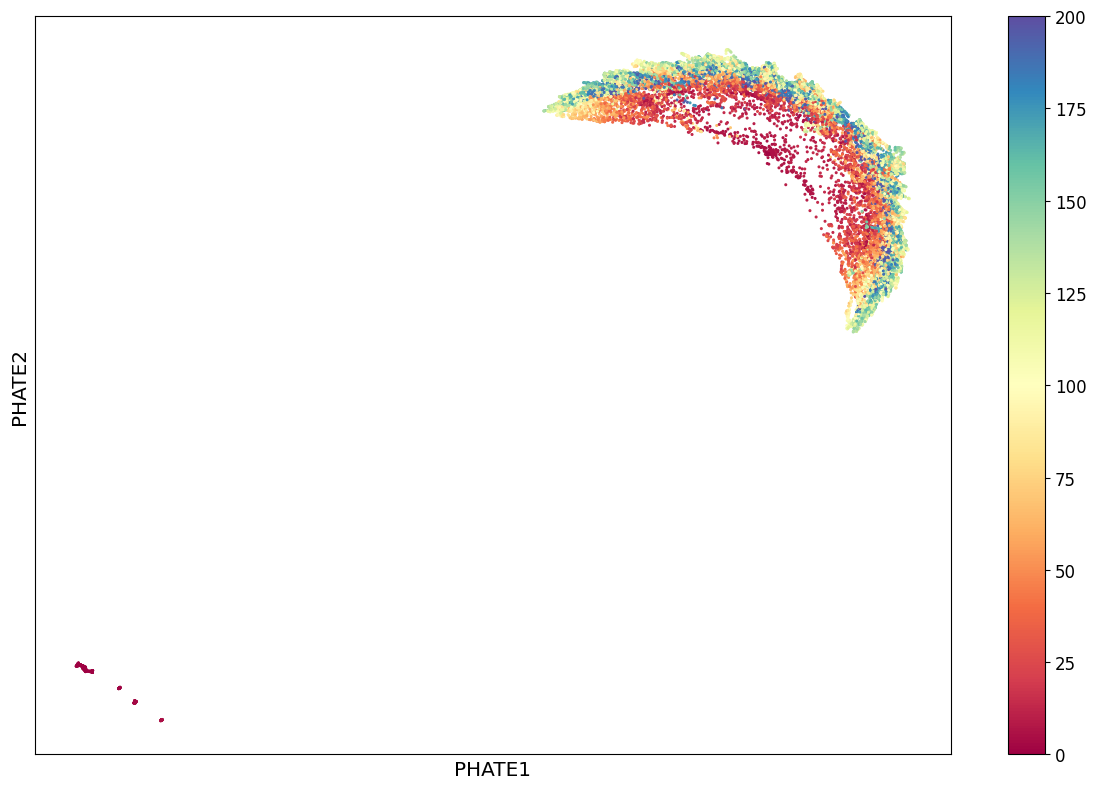

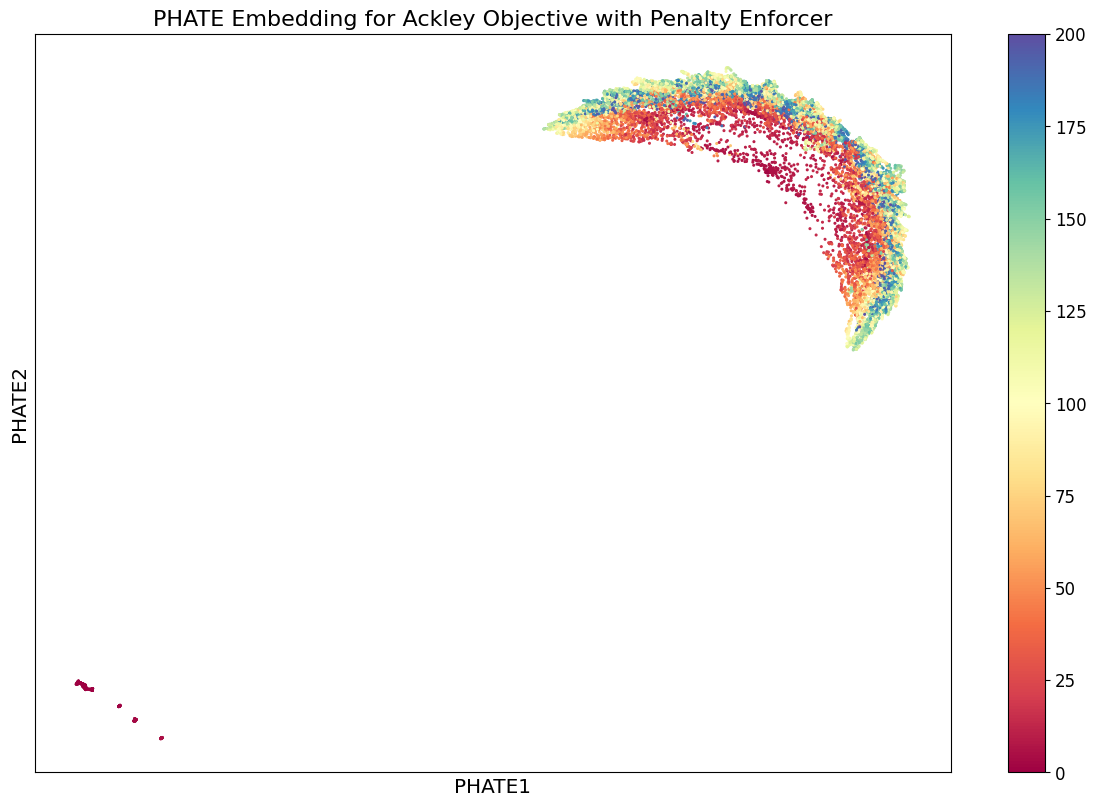

In [ ]:
scprep.plot.scatter2d(Y_phate, figsize=(12,8), c=time, cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

scprep.plot.scatter2d(Y_phate, figsize=(12, 8), c=time, cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

plt.title("PHATE Embedding for Rastrigin Objective with Penalty Enforcer", fontsize=16)
plt.savefig("PHATE_rastrigin_penalty.png", bbox_inches='tight')